In [1]:
import numpy as np
from copy import copy
%matplotlib inline

# **Ficha 3 - Exercício 2**
## Realizado pelos alunos da licenciatura em Engenharia Física, do turno de terça feira:
### Maria Gabriela Oliveira, A92841;
### Miguel Caçador Peixoto, A92838;






##### 8 de novembro de 2021

## O problema proposto esta semana é:



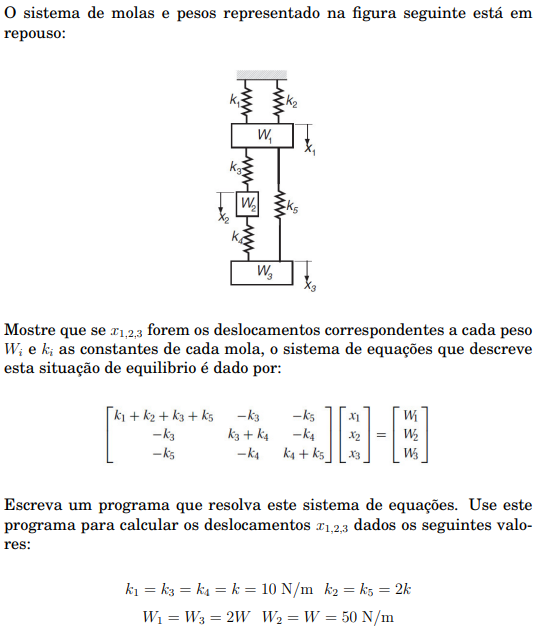

## Dedução da equação matricial
Olhando ao esquema apresentado é facil perceber que de uma forma geral:

\begin{align}
\vec{F_{Resultante}}=\vec{W}+\vec{F_{elástica}}
\end{align}

Sendo que o problema é unidirecional (vertical) e tendo em conta o ponto de equilíbrio ($\vec{F_{Resultante}}=\vec{0}$), chega-se a 

\begin{align}
W = -F_{elástica}
\end{align}
 
Sabendo que a *lei de Hooke* determina que a força exercida pela mola de constante $k$ em cada peso que se desloca $x$ é:

\begin{align}
F_{elástica}=-k*x
\end{align}

Chega-se facilmente às equações que descrevem a dinâmica do sistema.

$\hspace{10pt}$

Analisa-se então cada peso, mola a mola.

> Começando pelo peso $W_{1}$:


$W_{1}=-(-x_{1}*k_{1}-x_{1}*k_{2}-(x_{1}-x_{2})*k_{3}-(x_{1}-x_{3})*k_{5}) =x_{1}*k_{1}+x_{1}*k_{2}+(x_{1}-x_{2})*k_{3}+(x_{1}-x_{3})*k_{5}$

Organizando os termos acima em função de $x_{1}$, $x_{2}$ e $x_{3}$ iremos obter:

$W_{1}=(k_{1}+k_{2}+k_{3}+k_{5})*x_{1}-k_{3}*x_{2}-k_{5}*x_{3}$  (1)

Ou seja,

*   Se aumentarmos $x_1$ infinitesimalmente no seu sentido positivo como mostra a  figura teremos forças no sentido positivo do eixo dos **z** dadas pelas molas com constantes $k1$, $k2$, $k3$ e $k5$

*   Se aumentarmos $x_2$ infinitesimalmente no seu sentido positivo como mostra a figura teremos uma força no sentido negativo do eixo dos **z** dada pela mola com constante $k3$.

*   Se aumentarmos $x_3$ infinitesimalmente no seu sentido positivo como mostra a figura teremos uma força no sentido negativo do eixo dos **z** dada pela mola com constante $k5$.

> Agora para o peso $W_{2}$:    

$W_{2}=-(-(x_{2}-x_{1})*k_{3}-(x_{2}-x_{3})*k_{4})=(x_{2}-x_{1})*k_{3}+(x_{2}-x_{3})*k_{4}$

Organizando os termos acima em função de $x_{1}$, $x_{2}$ e $x_{3}$ iremos obter::

$W_{2}=-k_{3}*x_{1}+(k_{3}+k_{4})*x_{2}-k_{4}*x_{3}$  (2)

Ou seja,

*   Se aumentarmos $x_1$ infinitesimalmente no seu sentido positivo como mostra a figura teremos uma força no sentido negativo do eixo dos **z** dada pela mola com constante $k3$.

*   Se aumentarmos $x_2$ infinitesimalmente no seu sentido positivo como mostra a  figura teremos forças no sentido positivo do eixo dos **z** dadas pelas molas com constantes $k3$ e $k4$

*   Se aumentarmos $x_3$ infinitesimalmente no seu sentido positivo como mostra a figura teremos uma força no sentido negativo do eixo dos **z** dada pela mola com constante $k4$.


> Para o peso  $W_{3}$:

$W_{3}=-(-(x_{3}-x_{2})*k_{4}-(x_{3}-x_{1})*k_{5})=(x_{3}-x_{2})*k_{4}+(x_{3}-x_{1})*k_{5}$

Organizando os termos acima em função de $x_{1}$, $x_{2}$ e $x_{3}$ iremos obter:::

$W_{3}=-k_{5}*x_{1}-k_{4}*x_{2}+(k_{4}+k_{5})*x_{3}$  (3)

Ou seja,

*   Se aumentarmos $x_1$ infinitezimalmente no seu sentido positivo como mostra a figura teremos uma força no sentido negativo do eixo dos **z** dada pela mola com constante $k5$.

*   Se aumentarmos $x_2$ infinitezimalmente no seu sentido positivo como mostra a figura teremos uma força no sentido negativo do eixo dos **z** dada pela mola com constante $k4$.

*   Se aumentarmos $x_3$ infinitezimalmente no seu sentido positivo como mostra a  figura teremos forças no sentido positivo do eixo dos **z** dadas pelas molas com constantes $k4$ e $k5$


> Finalmente conclui-se que o sistema obtido é simplesmente as equações 1, 2 e 3 na forma matricial.





Define-se abaixo as condições exigidas no problema e as equações sob a forma de matriz.

In [2]:
k1 = k3 = k4 = k = 10
k2 = k5 = 2 * k

w2 = w = 50
w1 = w3 = 2 * w

a = np.array([
    [k1+k2+k3+k5,   -k3,        -k5],
    [-k3,           k3+k4,      -k4],
    [-k5,           -k4,        k4+k5]
],dtype=np.float64)

b = np.array([w1, w2, w3], dtype=np.float64)


# Método decomposição LU

Umas das limitações do método de Gauss para a resolução de sistemas é que todas as operações realizadas implicam o lado direito da equação também. Assim, é possível escrever a matriz $A$ como sendo o produto das matrizes triangulares $L$ e $U$.

Desta forma fatoriza-se a matriz $A$ de modo a obter o sistema:

$Ax=b \Leftrightarrow LUx = b \Leftrightarrow L(Ux) = b \Leftrightarrow 
\begin{cases}
 Ux = y \\
 Ly= b
 \end{cases} $

Como se pode ver, as matrizes $L$ e $U$ foram encontradas sem recorrer ao vetor $b$, este só é utilizado para a resolução do sistema acima.

In [3]:
def lu(x):
    l=len(x[1])
    a=x.copy()  # triangular superior
    b=np.identity(l,dtype=np.float64) # triangular inferior

    for k in range(0,l): 
        for i in range(k+1,l,1):
            # guarda-se o primeiro elemento não nulo de cada linha
            c=a[i][k] 
            for j in range(k,l,1):
                # subtrai-se a linha i as linhas abaixo de i 
                # de forma a anular o primeiro elemento não nulo de cada linha
                a[i][j]=a[i][j]-c*((a[k][j])/a[k][k])
            
            # Pela definição de decomposição LU a matriz L
            # corresponde aos elementos a que se multiplicou as linhas de a para tornar as linhas inferiores 0
            # em cada posição, ou seja, os coeficientes a[i][k]/a[k][k]
            b[i][k]=c/a[k][k]  
  
            
    return b,a

In [4]:
l,u = lu(a)
%time

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


Assim, após terem sido calculadas as matrizes $L$ e $U$ verificou-se a sua validade usando a função matmul do numpy onde se verifica que $L * U$ é de facto igual à matriz original.

In [5]:
print(f"> Matriz L:\n{l}\n\n> Matriz U:\n{u}\n\n> L x U:\n{np.matmul(l,u)}")

> Matriz L:
[[ 1.          0.          0.        ]
 [-0.16666667  1.          0.        ]
 [-0.33333333 -0.72727273  1.        ]]

> Matriz U:
[[ 60.         -10.         -20.        ]
 [  0.          18.33333333 -13.33333333]
 [  0.           0.          13.63636364]]

> L x U:
[[ 60. -10. -20.]
 [-10.  20. -10.]
 [-20. -10.  30.]]


Após serem calculadas as matrizes $LU$ procedeu-se à resolução do sistema previamente mencionado.

In [6]:
# Retro-eliminição para a matriz triângular inferior
def resolucao_p1(l,b):
    l = copy(l)
    b = copy(b)

    # Já temos o primeiro elemento
    # da matriz y visto que a diagonal de L é 1
    y=[b[0]]

    for i in range(1,l.shape[0],1):
        # Inicializar buffer
        w=0

        # Para cada variavel que nós já sabemos
        # vamos substitui-la na linha e somar ao buffer
        for k in range(i):
            w+=l[i][k]*y[k]

        # Vamos adicionar a nova solução
        # encontrada à matriz y
        y.append(b[i]-w)

    return np.array(y)


# Retro-eliminação para triângular superior
def resolucao_p2(a,b):
    x=[]

    dim=len(a)
    # Encontra-se primeiro a última solução
    xx=b[-1]/(a[-1][-1])
    # Coloca-se essa solução na lista de soluções (inicialmente vazia)
    x.append(xx)
    # vai-se substituindo as as soluções que já se sabem linha a linha
    # em cada linha encontra-se uma nova solução
    # percorre-se a matriz de baixo para cima.
    for i in range(dim-2,-1,-1):
        y=0
        for k in range(i+1,dim):
            y+=a[i][k]*x[dim-1-k]
        xx=(1/a[i][i])*(b[i]-y)
        x.append(xx)
    # Após obtidas todas as soluções é necessário coloca-las na ordem correta
    x.reverse()
    return x

Assim, iremos começar por calcular os valores de $y$ por eliminação ($Ly= b$):

In [7]:
y=resolucao_p1(l,b)


E agora sabendo o valor de y, basta resolver $Ux = y$ por retro-eliminação.

In [8]:
resolucao_p2(u,y)


[8.333333333333332, 13.33333333333333, 13.33333333333333]

In [9]:
l,u=lu(a)
resolucao_p2(u,resolucao_p1(l,b))
%time

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs


# Método 2 - Apenas por eliminação (usado no último TPC)

De modo a verificar os resultados obtidos em cima usamos o metodo exposto no ultimo TPC para resolver o sistema e comprovar a veracidade dos resultados.

In [10]:
def metodo2(matrix, results):
  # N será o tamanho da matriz
  n = matrix.shape[0]

  ## Colocar o triangulo inferior a 0's
  # Para cada linha da matriz..
  for line in range(n):
      # Dividir a linha pelo seu pivot 
      # de modo a ter a diagonal = 1
      pivot = matrix[line][line]
      matrix[line] = matrix[line]/pivot
      results[line] =  results[line]/pivot

      # Para cada uma das linhas por baixo
      # do pivot, vamos subtrair à linha
      # a linha do nosso pivot * uma constante, 
      # de modo a que, na coluna do pivot, por baixo deste
      # apenas haja zeros
      for other_line in range(n-line-1):
          # Queremos que no lugar do 'pivot_atual' seja 0
          pivot_atual = matrix[other_line+line+1][line]
          matrix[other_line+line+1] = matrix[other_line+line+1] - (pivot_atual/1) * matrix[line]
          results[other_line+line+1] = results[other_line+line+1] - (pivot_atual/1) * results[line]


  ## Colocar o triangulo superior a 0's
  # Agora vamos começar de baixo para cima ou seja,
  # para cada linha a cima de cada pivot (o 1 na diagonal)
  # vamos subtrair a linha atual * uma constante de modo a que
  # em cima de cada 1 na diagonal, haja só 0's
  for line in range(1, n, 1):
      for other_line in range(1, n-line+1, 1):
        # Queremos que no lugar do 'pivot_atual' seja 0
        pivot_atual =  matrix[-other_line-line][-line]
        matrix[-other_line-line] = matrix[-other_line-line] - (pivot_atual) * matrix[-line]
        results[-other_line-line] = results[-other_line-line] - (pivot_atual) * results[-line]

  
  # Sanity check - Vamos ver se no final transformamos completamente
  # a nossa matriz original na matriz identidade.
  assert (matrix == np.identity(matrix.shape[0])).all(), "[!] An error occured! Solution is not valid"

  # Mostrar os resultados
  print("Results:")
  for x in [f"\ta{i} = {results[i]}" for i in range(n)]:
      print(x)

metodo2(a,b)

Results:
	a0 = 8.333333333333332
	a1 = 13.333333333333332
	a2 = 13.33333333333333


In [11]:
metodo2(a,b)
%time

Results:
	a0 = 8.333333333333332
	a1 = 13.333333333333332
	a2 = 13.33333333333333
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


##Conclusões

Analisando os tempos de execução, observou-se que de facto o método 1 é mais rápido/eficiente que o método 2 - 5.01 µs vs 7.63 µs, respetivamente.

Como no método 1 descompôs-se previamente a matriz $A$ nas matrizes $L\space U$, uma operação que não implica o vetor $b$, ou seja no fundo implica menos uma coluna, era esperado que este método fosse mais eficiente e verificou-se.
Note que quando maiores forem as matrizes mais notável esta diferença de tempos se torna.

Este método é ainda especialmente útil se se desejar manter o mesmo lado esquerdo da equação e repetir para um lado direito diferente, uma vez que as matriz $L\space U$ são as mesmas.